# Análisis exploratorio de datos

Importamos librerias y archivos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [3]:
df_trips = pd.read_csv('../datasets/sql_result_01.csv')
df_avg = pd.read_csv('../datasets/location_average_trip_duration.csv') 

Nos aseguramos que los tipos de datos sean los correctos y que el df se visualice correctamente

In [ ]:
df_trips.info()
df_trips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
df_avg.info()
df_avg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


## Obtenemos los 10 barrios con mayor promedio de viajes finalizados en Chicago.

In [12]:
top_neighborhoods = df_avg.sort_values(by='average_trips', ascending=True).tail(10)

top_neighborhoods

,dropoff_location_name,average_trips
9,Sheffield & DePaul,1259.766667
8,Gold Coast,1364.233333
7,Museum Campus,1510.000000
6,Grant Park,2068.533333
5,Lake View,2420.966667
4,O'Hare,2546.900000
3,West Loop,5163.666667
2,Streeterville,6664.666667
1,River North,9523.666667
0,Loop,10727.466667


Observacion: Se ordenaron de manera inversa para poder graficar de manera horizontal para poder visualizar mejor los nombres de los barrios.

<Figure size 1200x600 with 0 Axes>

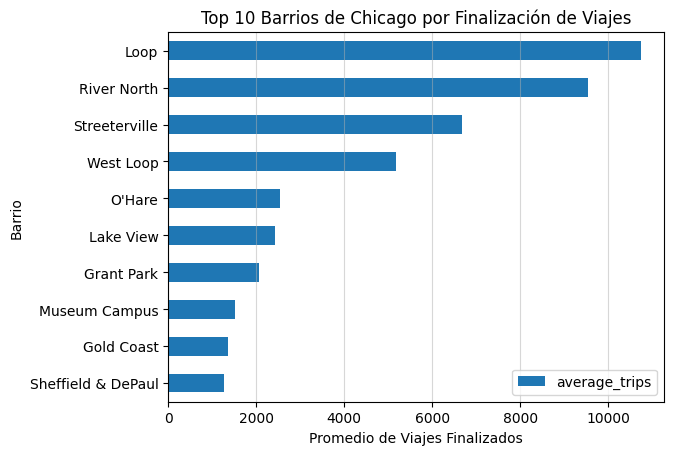

In [13]:
# Creamos la figura

plt.figure(figsize=(12, 6))

# Graficamos horizontalmente para una mejor visualizacion

top_neighborhoods.plot(kind='barh', x='dropoff_location_name', y='average_trips')
plt.title('Top 10 Barrios de Chicago por Finalización de Viajes')
plt.xlabel('Promedio de Viajes Finalizados')
plt.ylabel('Barrio')

# Agrego cuadricula para facilitar la lectura

plt.grid(axis='x', alpha=0.5)

plt.show()

### Conclusiones del grafico
`The Loop`, `River North`, `Streeterville` y `West Loop` estos cuatro barrios representan la mayoría de los ingresos

#### Despues de haber realizado una investigacion socio-cultural de los barrios puedo concluir:
1. Tiene sentido que `The Loop` es el barrio mas visitado porque hay una gran concetracion de oficinas y estaciones de tren. Lo más probable es que sean `viajes de negocios o trámites`.
2. `River North`: Aquí el uso es principalmente ocio y vida nocturna. Es el destino #1 para cenas elegantes y bares. Puede existir un patrón común: viajes desde `The Loop` hacia `River North` después del trabajo.
3. A partir de `O'Hare`, el volumen se estabiliza. Descubrí que `O'Hare` es un aeropuerto internacional, tiene menos finalizaciones de viajes que los barrios del centro. Esto tiene sentido: la gente va al aeropuerto una vez, pero se mueve por el centro varias veces al día.
4. `Lake View`: Es un barrio residencial. Esto sugiere una población que prefiere transporte privado sobre el transporte público para moverse hacia el centro.
5. `Grant Park` y `Museum Campus` al ser zonas de parques y museos, es muy probable que estos datos varíen drásticamente según la estación del año o si hubo eventos sociales.
6. `Sheffield & DePaul`: Es zona universitaria, el volumen es menor, posiblemente porque los estudiantes usan más el transporte publico por economía.

## Obtenemos las 10 compañias de transporte con mas viajes

In [7]:
top_companies = df_trips.sort_values(by='trips_amount', ascending=True).tail(10)

top_companies

,company_name,trips_amount
9,Blue Ribbon Taxi Association Inc.,5953
8,Star North Management LLC,7455
7,Sun Taxi,7701
6,City Service,8448
5,Chicago Carriage Cab Corp,9181
4,Taxi Affiliation Service Yellow,9299
3,Yellow Cab,9888
2,Medallion Leasin,10367
1,Taxi Affiliation Services,11422
0,Flash Cab,19558


Observacion: Se ordenaron de manera inversa para poder graficar de manera horizontal para poder visualizar mejor los nombres de las empresas.

<Figure size 1200x600 with 0 Axes>

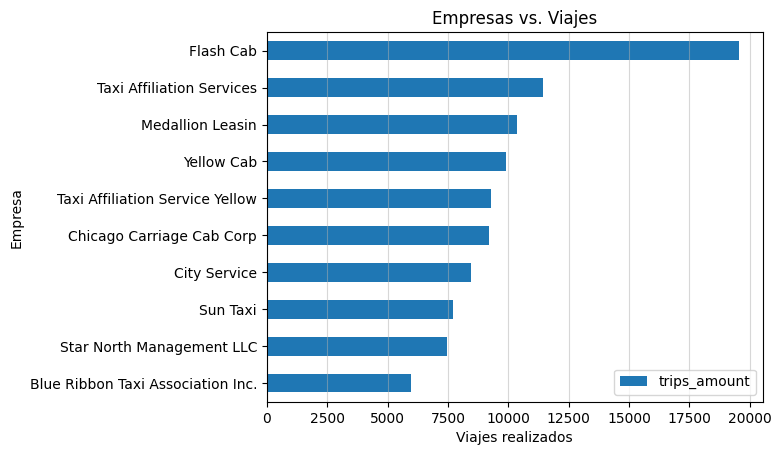

In [8]:
# Creamos la figura

plt.figure(figsize=(12, 6))

# Graficamos horizontalmente para una mejor visualizacion

top_companies.plot(kind='barh', x='company_name', y='trips_amount')
plt.title('Empresas vs. Viajes')
plt.xlabel('Viajes realizados')
plt.ylabel('Empresa')

# Agregamos cuadricula para facilitar la lectura

plt.grid(axis='x', alpha=0.5)

plt.show()

### Conclusiones del grafico:

La compañia `Flash Cab` domina el mercado por casi el doble de viajes. Esto se debe a que la campaña de marketing de la companía tuvo un efecto positivo, tiene una flota mayor de conductores o ambas.

## Preparación de los datos
Antes de la estadística, necesitamos separar nuestra muestra en dos grupos independientes basados en la columna weather_conditions:

- `Grupo A (Good)`: Duración de viajes con clima despejado.

- `Grupo B (Bad)`: Duración de viajes con lluvia o tormenta.

Cargamos el dataset con los viajes que comenzaron en `The Loop` y terminaron en `O'Hare` un sábado, junto con las condiciones climáticas y la duración del viaje.

In [14]:
df_weather = pd.read_csv('../datasets/sql_result_06.csv')

In [15]:
good_weather_duration = df_weather[df_weather['weather_conditions'] == 'Good']['duration_seconds'] 
bad_weather_duration = df_weather[df_weather['weather_conditions'] == 'Bad']['duration_seconds']

In [16]:
# Hacemos una impresion de ambas series para validar
good_weather_duration.head(10)

0     2410.0
1     1920.0
2     1543.0
3     2512.0
4     1440.0
5     1320.0
7     2280.0
8     2460.0
9     2040.0
10    1500.0
Name: duration_seconds, dtype: float64

In [17]:
bad_weather_duration.head(10)

6     2969.0
30    1980.0
34    2460.0
51    2760.0
52    2460.0
54    1440.0
65    2363.0
70    3000.0
78    3120.0
92    1511.0
Name: duration_seconds, dtype: float64

## Planteamiento de las Hipótesis
### Hipótesis Nula ($H_0$)
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual en sábados lluviosos y sábados de buen clima.
### Hipótesis Alternativa ($H_1$)
La duración promedio de los viajes es `diferente` entre sábados lluviosos y sábados de buen clima.


## Elección de criterio
Para comparar las medias de dos poblaciones independientes, el estandar de la industria es la `Prueba t`
- `¿Por qué este criterio?` Porque estamos comparando las medias de dos grupos separados y queremos saber si la diferencia observada es estadísticamente significativa o si pudo ser puro azar.
- `Nivel de significancia ($\alpha$)`: Lo más común es usar 0.05 (5%). Esto significa que si hay menos de un 5% de probabilidad de que la diferencia sea por azar, rechazaremos la hipótesis nula.

## Ejecución en Python

Creamos un grafico de caja para visualizar la diferencia en la duración de los viajes y complementar la prueba de hipótesis

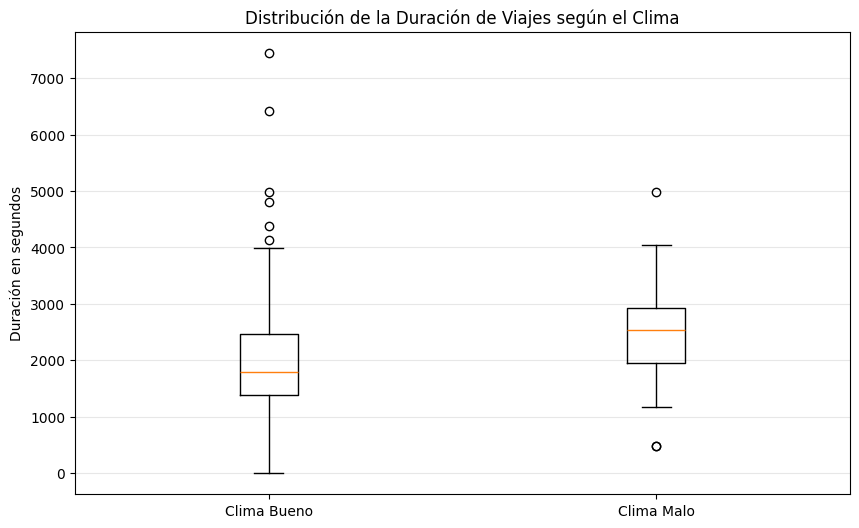

In [23]:
# Preparamos los datos en una lista

datos_grafico = [good_weather_duration, bad_weather_duration]

# Creamos la figura

plt.figure(figsize=(10,6))

# Dibujamos el gráfico de caja

plt.boxplot(datos_grafico, tick_labels=['Clima Bueno', 'Clima Malo'])
plt.title('Distribución de la Duración de Viajes según el Clima')
plt.ylabel('Duración en segundos')
plt.grid(axis='y', alpha=0.3)

plt.show()

### Conclusión del Gráfico
El boxplot confirma visualmente que las condiciones climáticas "Malas" desplazan la distribución de la duración de los viajes hacia arriba. La diferencia en las medianas proporciona una base sólida para la conclusión estadística: la lluvia y las tormentas aumentan significativamente el tiempo necesario para completar el trayecto del `The Loop` a `O'Hare`.

### Procedemos con la conclusión estadística:

In [20]:
# Calculamos las varianza de ambas muestras para determinar que tipo de prueba t realizaremos


var_good =  good_weather_duration.var()
var_bad = bad_weather_duration.var()

print(var_good)
print(var_bad)

576382.009689509
520294.086002483


Realizaremos la prueba t de Student. Usamos `equal_var=False` (Prueba de Welch) porque las varianzas de las muestras no son idénticas (`576,382` vs `520,294`), asegurando un resultado más robusto.

In [21]:
alpha = 0.05
results = st.ttest_ind(good_weather_duration, bad_weather_duration, equal_var=False)

print('valor p:', results.pvalue)

valor p: 6.738994326108734e-12


In [22]:
if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')


Rechazamos la hipotesis nula


# Conclusión General del Proyecto: Zuber Chicago
## 1. Resultados de la Prueba de Hipótesis
- Dado que el valor p ($6.73 \times 10^{-12}$) es significativamente menor que nuestro nivel de alfa establecido ($0.05$), contamos con evidencia suficiente para rechazar la hipótesis nula.
- Se confirma que la duración promedio de los viajes desde `The Loop` hasta el Aeropuerto Internacional `O'Hare` cambia los sábados lluviosos.
- El clima tiene un alto impacto en el servicio. Las condiciones de lluvia o tormenta ("Bad") impactan directamente en los tiempos de traslado, probablemente debido al tráfico por una conducción más precavida.
## 2. Hallazgos del Análisis Exploratorio
- `Flash Cab` se posiciona como el líder del mercado en volumen de viajes, superando significativamente a sus competidores directos.
- `The Loop` es el epicentro de la actividad de transporte, seguido por `River North`, `West Loop` y `Streeterville`. Para Zuber, estos barrios representan las zonas de mayor demanda donde se debe optimizar la disponibilidad de conductores.
